<div style="text-align: center"><h1>Topics – Easy Topic Modeling in Python</h1></div>

The text mining technique **Topic Modeling** has become a popular statistical method for clustering documents. This notebook introduces an user-friendly workflow, basically containing data preprocessing, an implementation of the prototypic topic model **Latent Dirichlet Allocation** (LDA) which learns the relationships between words, topics, and documents, as well as multiple visualizations to explore the trained LDA model.

In this notebook, we're relying on the LDA implementation by [Andrew McCallum](https://people.cs.umass.edu/~mccallum/) called [**MALLET**](https://radimrehurek.com/gensim/).

## 1. Preprocessing

Let's not pay heed to any warnings right now and execute the following cell.

In [1]:
import warnings
warnings.filterwarnings('ignore')

#### Loading modules from DARIAH-Topics library
First, we have to get access to the functionalities of the library by importing them.

In [2]:
from dariah_topics import preprocessing
from dariah_topics import doclist
from dariah_topics import meta
from dariah_topics import mallet
from dariah_topics import visualization

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
The bokeh.charts API has moved to a separate 'bkcharts' package.

This compatibility shim will remain until Bokeh 1.0 is released.
After that, if you want to use this API you will have to install
the bkcharts package explicitly.

  warn(message)


#### Activating inline output in Jupyter notebook
The following line will just tell the notebook to show graphics in the output frames.

In [3]:
%matplotlib inline

#### Output folder
This is where you can find the already trained data

In [4]:
outfolder = "/Users/MHuber/Documents/SS2017/grenzbote_mallet_output_rechenknecht"

### Create document-topic matrix

The generated model object can now be translated into a human-readable document-topic matrix (that is a actually a pandas data frame) that constitutes our principle exchange format for topic modeling results. For generating the matrix from a Gensim model, we can use the following function:

In [5]:
doc_topic = mallet.show_doc_topic_matrix(outfolder)
#doct_topic

## 3. Visualization

In [6]:
topic_keys = mallet.show_topics_keys(outfolder, num_topics=20)
#topic_keys

In [7]:
topic_keys.loc[['Topic 5','Topic 6', 'Topic 7']]

,Key 1,Key 2,Key 3,Key 4,Key 5,Key 6,Key 7,Key 8,Key 9,Key 10
Topic 5,regierung,preußen,partei,deutschen,politik,deutschland,politischen,preußischen,frankreich,frage
Topic 6,armee,truppen,general,soldaten,offiziere,franzosen,heer,krieg,schlacht,kriege
Topic 7,dichter,goethe,kunst,poesie,musik,leben,dichters,liebe,dichtung,natur


regierung preußen partei deutschen politik deutschland politischen preußischen frankreich frage 
armee truppen general soldaten offiziere franzosen heer krieg schlacht kriege 
dichter goethe kunst poesie musik leben dichters liebe dichtung natur 


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/pyplot.py'>

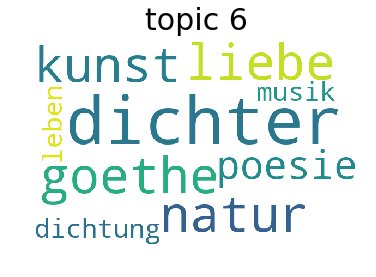

In [13]:
visualization.plot_wordle_from_mallet(word_weights_file='/Users/MHuber/Documents/SS2017/grenzbote_mallet_output_rechenknecht/topic_word_weights.txt',topic_nr=4,number_of_top_words=10,outfolder='/Users/MHuber/Documents/SS2017/grenzbote_mallet_output_rechenknecht',dpi=900)

armee truppen general soldaten offiziere franzosen heer krieg schlacht kriege 


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/pyplot.py'>

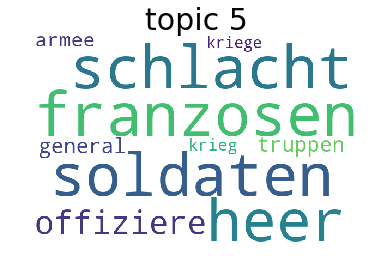

In [14]:
visualization.plot_wordle_from_mallet(word_weights_file='/Users/MHuber/Documents/SS2017/grenzbote_mallet_output_rechenknecht/topic_word_weights.txt',topic_nr=5,number_of_top_words=10,outfolder='/Users/MHuber/Documents/SS2017/grenzbote_mallet_output_rechenknecht',dpi=900)

dichter goethe kunst poesie musik leben dichters liebe dichtung natur 


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/pyplot.py'>

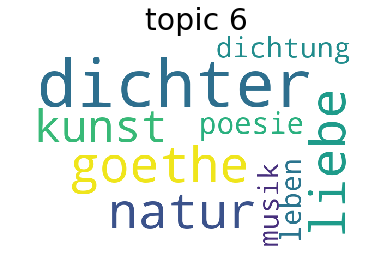

In [15]:
visualization.plot_wordle_from_mallet(word_weights_file='/Users/MHuber/Documents/SS2017/grenzbote_mallet_output_rechenknecht/topic_word_weights.txt',topic_nr=6,number_of_top_words=10,outfolder='/Users/MHuber/Documents/SS2017/grenzbote_mallet_output_rechenknecht',dpi=900)


In [9]:
#getdict_topic_over_time(labels=['armee truppen general', 'schule lehrer sprache', 'kirche katholischen gott','dichter leben kunst'],threshold=0.1, starttime = 1841, endtime=1920)


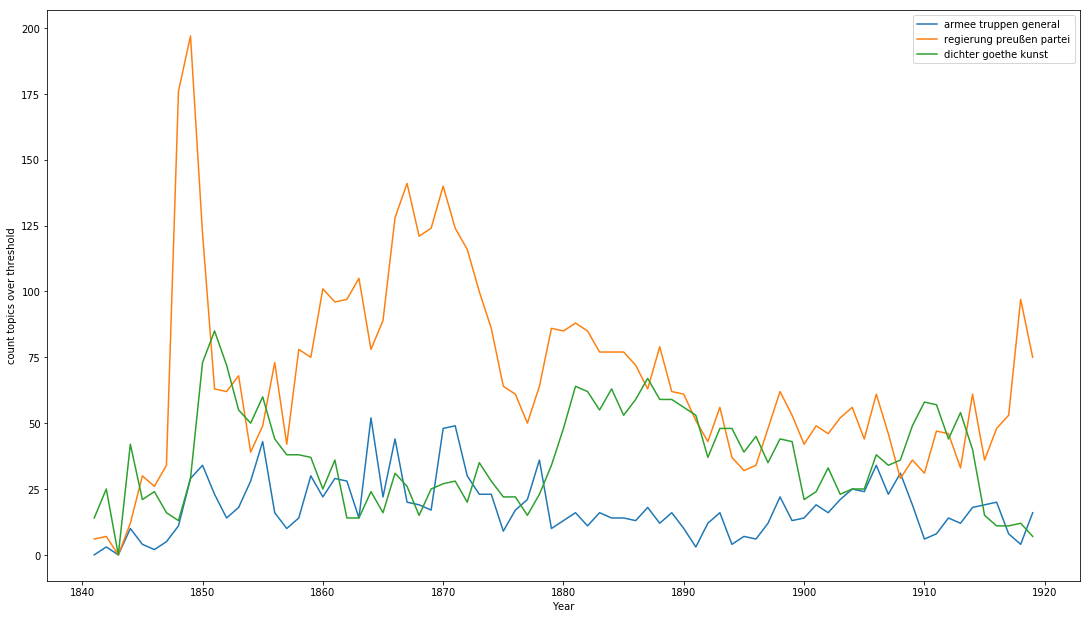

In [10]:
from collections import defaultdict
import matplotlib.pyplot as plt


def getdict_topic_over_time(labels=['armee truppen general', 'regierung preußen partei', 'dichter goethe kunst'],threshold=0.1, starttime = 1841, endtime=1920):
    dictList=[]
    years=list(range(starttime,endtime))
    doc_topicT = doc_topic.T
    for label in labels:
        topic_over_threshold_per_year =[]
        df = doc_topicT.loc[doc_topicT[label] >  threshold]
        d = defaultdict(int)
        for item in df.index.values:
            year = item.split('_')
            d[year[0]]+=1
        for year in years:
            topic_over_threshold_per_year.append(d[str(year)])
        #print("years: ", years, " topic_over_threshold_per_year: ", topic_over_threshold_per_year)
        plt.plot(years, topic_over_threshold_per_year, label=label)
                   
    plt.xlabel('Year')
    plt.ylabel('count topics over threshold')
    #nicht notwendig
    #plt.xlim = (range(starttime,endtime))
    plt.legend()
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.show()
    
getdict_topic_over_time(labels=['armee truppen general', 'regierung preußen partei', 'dichter goethe kunst'],threshold=0.1, starttime = 1841, endtime=1920)
    